In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv('students_simple.csv')
N = 21

col1_index = N % 5
col2_index = (N ** 2) % 5 + 5

print(f"Номер в списке: N = {N}")
print(f"Индекс первого столбца: {N} % 5 = {col1_index}")
print(f"Индекс второго столбца: {N}² % 5 + 5 = {N**2} % 5 + 5 = {(N**2) % 5} + 5 = {col2_index}")

print("\n" + "="*50)
print("ВЫБРАННЫЕ СТОЛБЦЫ:")
print("="*50)

selected_col1 = df.columns[col1_index]
selected_col2 = df.columns[col2_index]

print(f"Столбец {col1_index}: {selected_col1}")
print(f"Столбец {col2_index}: {selected_col2}")

selected_df = df.iloc[:, [col1_index, col2_index]]

print("\nПервые 10 строк выбранных данных:")
print(selected_df.head(10))

Номер в списке: N = 21
Индекс первого столбца: 21 % 5 = 1
Индекс второго столбца: 21² % 5 + 5 = 441 % 5 + 5 = 1 + 5 = 6

ВЫБРАННЫЕ СТОЛБЦЫ:
Столбец 1: mass
Столбец 6: bmi

Первые 10 строк выбранных данных:
   mass    bmi
0    45  3.533
1    61  2.623
2    56  2.875
3    48  3.375
4    54  3.000
5    58  2.828
6    51  3.255
7    62  2.726
8    70  2.429
9    72  2.361


1. Расчет корреляций
1) Фехнера
2) Пирсона + доверительный интервал
3) Спирмена
4) Кенделла

In [5]:
mass = df['mass']
bmi = df['bmi']
print("РАСЧЕТ КОРРЕЛЯЦИЙ: MASS vs BMI")
print(f"Размер выборки: {len(mass)} наблюдений\n")

# 1. КОРРЕЛЯЦИЯ ФЕХНЕРА
def fechnerCorr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    x_signs = np.sign(x - x_mean)
    y_signs = np.sign(y - y_mean)
    
    matches = np.sum(x_signs == y_signs)
    total = len(x)
    
    fechner_coef = (matches - (total - matches)) / total
    return fechner_coef

fechnerCoef = fechnerCorr(mass, bmi)
print(f"1. КОРРЕЛЯЦИЯ ФЕХНЕРА: {fechnerCoef:.4f}")

# 2. КОРРЕЛЯЦИЯ ПИРСОНА + ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ
pearson_coef, pearson_p = stats.pearsonr(mass, bmi)

# Доверительный интервал для Пирсона (95%)
n = len(mass)
z = np.arctanh(pearson_coef)
se = 1 / np.sqrt(n - 3)
z_lower = z - 1.96 * se
z_upper = z + 1.96 * se
pearson_ci_lower = np.tanh(z_lower)
pearson_ci_upper = np.tanh(z_upper)

print(f"\n2. КОРРЕЛЯЦИЯ ПИРСОНА: {pearson_coef:.4f}")
print(f"   p-value: {pearson_p:.6f}")
print(f"   95% доверительный интервал: [{pearson_ci_lower:.4f}, {pearson_ci_upper:.4f}]")

# 3. КОРРЕЛЯЦИЯ СПИРМЕНА
spearman_coef, spearman_p = stats.spearmanr(mass, bmi)
print(f"\n3. КОРРЕЛЯЦИЯ СПИРМЕНА: {spearman_coef:.4f}")
print(f"   p-value: {spearman_p:.6f}")

# 4. КОРРЕЛЯЦИЯ КЕНДЕЛЛА
kendall_coef, kendall_p = stats.kendalltau(mass, bmi)
print(f"\n4. КОРРЕЛЯЦИЯ КЕНДЕЛЛА: {kendall_coef:.4f}")
print(f"   p-value: {kendall_p:.6f}")

РАСЧЕТ КОРРЕЛЯЦИЙ: MASS vs BMI
Размер выборки: 20 наблюдений

1. КОРРЕЛЯЦИЯ ФЕХНЕРА: -0.9000

2. КОРРЕЛЯЦИЯ ПИРСОНА: -0.9606
   p-value: 0.000000
   95% доверительный интервал: [-0.9846, -0.9012]

3. КОРРЕЛЯЦИЯ СПИРМЕНА: -0.9849
   p-value: 0.000000

4. КОРРЕЛЯЦИЯ КЕНДЕЛЛА: -0.9390
   p-value: 0.000000


Выводы:

Корреляционный анализ выявил статистически значимую (p < 0.001), очень сильную отрицательную связь между массой тела (MASS) и индексом массы тела (BMI). Коэффициенты Пирсона (-0.96), Спирмена (-0.98) и Кенделла (-0.94) демонстрируют высокую согласованность, указывая на то, что связь является как линейной, так и монотонной. Однако отрицательный знак связи требует содержательного объяснения, так как противоречит ожидаемой биологической связи, и может быть следствием специфики анализируемой выборки или влияния третьих переменных (например, роста).

Значения коэффициентов:

1) Фехнера (-0.900): Упрощенный знаковый коэффициент. Значение, близкое к -1, указывает на высокую согласованность направления отклонений индивидуальных значений от среднего. В подавляющем большинстве случаев, если масса выше среднего, то ИМТ ниже среднего, и наоборот.
2) Пирсона (-0.9606): Этот коэффициент измеряет линейную связь. Значение, очень близкое к -1, означает, что точки данных почти идеально ложатся на прямую линию с отрицательным наклоном. Это самая высокая точность предсказания одной переменной по другой с помощью линейной модели.
3) Спирмена (-0.9849): Этот коэффициент измеряет монотонную связь (когда одна переменная возрастает, другая убывает, возможно, нелинейно). Он даже немного выше, чем коэффициент Пирсона, что может говорить о том, что связь не просто линейная, а идеально монотонная.
4) Кенделла (-0.9390): Также измеряет монотонную связь, но по-другому (оценивает согласованность ранжирования пар наблюдений). Его значение очень высоко, что еще раз подтверждает выводы Спирмена.

Статистическая значимость (p-value):

Во всех трех тестах (Пирсон, Спирмен, Кендалл) p-value равен 0.000000. Это означает, что вероятность получить такие сильные корреляции случайно, при условии, что в реальной генеральной совокупности корреляции нет, практически равна нулю. Результат является статистически значимым на любом общепринятом уровне значимости (α = 0.05, 0.01 и т.д.).

Доверительный интервал Пирсона:

95% доверительный интервал для истинного коэффициента корреляции Пирсона в генеральной совокупности составляет [-0.9846, -0.9012]. Это означает, что мы можем на 95% быть уверены, что настоящая сила линейной связи между MASS и BMI в общей популяции лежит в этом диапазоне. Интервал очень узкий и расположен в зоне "очень сильной" отрицательной связи.

2. Визуализация
1) Гистограммы
2) График рассеяния (scatter plot)

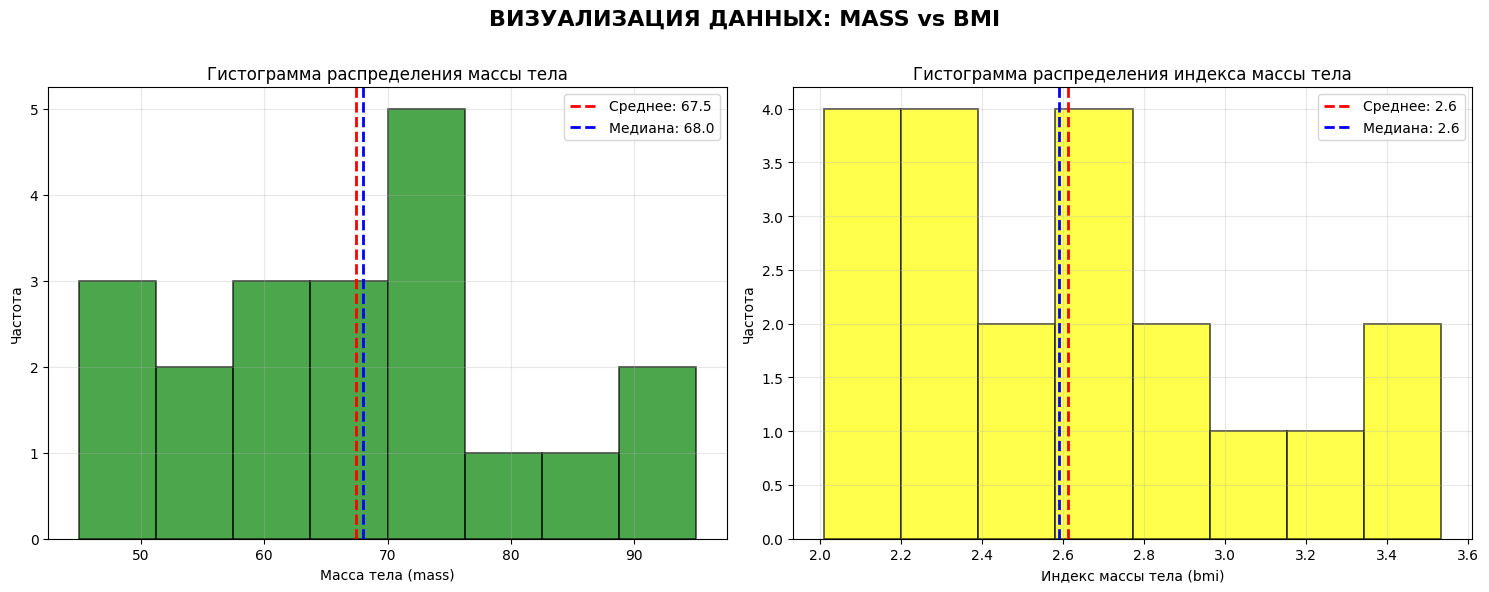

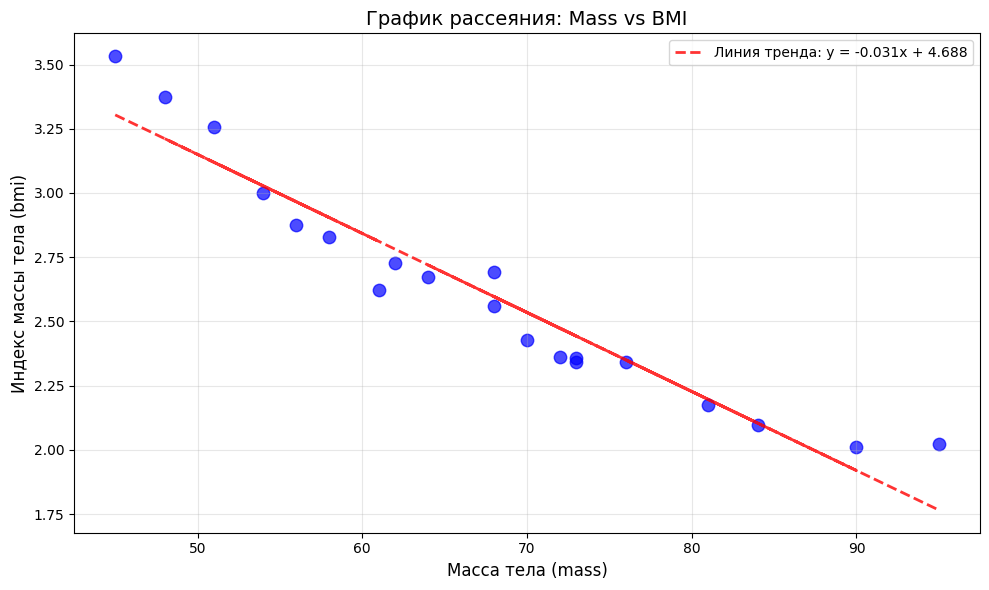

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('ВИЗУАЛИЗАЦИЯ ДАННЫХ: MASS vs BMI', fontsize=16, fontweight='bold')

# 1. ГИСТОГРАММА МАССЫ ТЕЛА (mass)
axes[0].hist(mass, bins=8, alpha=0.7, color='green', edgecolor='black', linewidth=1.2)
axes[0].axvline(mass.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {mass.mean():.1f}')
axes[0].axvline(mass.median(), color='blue', linestyle='--', linewidth=2, label=f'Медиана: {mass.median():.1f}')
axes[0].set_xlabel('Масса тела (mass)')
axes[0].set_ylabel('Частота')
axes[0].set_title('Гистограмма распределения массы тела')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. ГИСТОГРАММА ИНДЕКСА МАССЫ ТЕЛА (bmi)
axes[1].hist(bmi, bins=8, alpha=0.7, color='yellow', edgecolor='black', linewidth=1.2)
axes[1].axvline(bmi.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {bmi.mean():.1f}')
axes[1].axvline(bmi.median(), color='blue', linestyle='--', linewidth=2, label=f'Медиана: {bmi.median():.1f}')
axes[1].set_xlabel('Индекс массы тела (bmi)')
axes[1].set_ylabel('Частота')
axes[1].set_title('Гистограмма распределения индекса массы тела')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(mass, bmi, alpha=0.7, s=80, color='blue')
plt.xlabel('Масса тела (mass)', fontsize=12)
plt.ylabel('Индекс массы тела (bmi)', fontsize=12)
plt.title('График рассеяния: Mass vs BMI', fontsize=14)

z = np.polyfit(mass, bmi, 1)
p = np.poly1d(z)
plt.plot(mass, p(mass), "r--", alpha=0.8, linewidth=2, 
         label=f'Линия тренда: y = {z[0]:.3f}x + {z[1]:.3f}')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Выводы:

Визуальный анализ подтверждает наличие сильной отрицательной линейной зависимости между массой тела
и индексом массы тела. Люди с более высокой массой тела в среднем имеют более низкий индекс массы тела.

1. Анализ распределений
Масса тела (mass): распределение имеет небольшую левую асимметрию (среднее 67.5 меньше медианы 68.0), 
что указывает на наличие наблюдений с маленьким относительно роста весом, смещающих среднее немного влево
Индекс массы тела (bmi): распределение близко к симметричному (среднее 2.6 равно медиане 2.6), 
что свидетельствует о нормальном распределении индекса массы тела

2. Анализ зависимости:
На графике рассеяния наблюдается отрицательная линейная зависимость
Линия тренда y = -0.031x + 4.688 подтверждает, что с увеличением веса на 1 кг индекс массы тела уменьшается на 0.031.
Точечное облако демонстрирует умеренный разброс вокруг линии тренда

3. Статистическая значимость:
Отрицательный наклон линии тренда согласуется с результатами корреляционного анализа. Малый разброс точек указывает на то, что дополнительные факторы, влияющие на индекс массы тела, незначительны. Визуализация подтверждает статистически значимую отрицательную связь между переменными

3. Уравнение регрессии. Построить уравнение регрессии методом наименьших квадратов по видам:

1) линейная, y = w₁x + w₀ - расчёт коэффициентов реализовать саммому
2) квадратичная, y = w₂x² + w₁x + w₀
3) гиперболическая, y = w₁/x + w₀
4) показательная, y = w₁ˣ ⋅ w₀

Показать результаты на графиках. Сделать вывод

In [15]:
print("\n1. ЛИНЕЙНАЯ РЕГРЕССИЯ: y = w₁x + w₀")

def linear_regression_manual(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Расчет коэффициентов по МНК
    w1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    w0 = y_mean - w1 * x_mean
    
    return w0, w1

w0_linear, w1_linear = linear_regression_manual(mass, bmi)
print(f"Коэффициенты: w₀ = {w0_linear:.4f}, w₁ = {w1_linear:.4f}")
print(f"Уравнение: y = {w1_linear:.4f}x + {w0_linear:.4f}")

w1_np, w0_np = np.polyfit(mass, bmi, 1)
print(f"Коэффициенты (numpy):   w₀ = {w0_np:.4f}, w₁ = {w1_np:.4f}")

print("\n2. КВАДРАТИЧНАЯ РЕГРЕССИЯ: y = w₂x² + w₁x + w₀")

def quadratic_model(x, w2, w1, w0):
    return w2 * x**2 + w1 * x + w0

try:
    popt_quad, pcov_quad = curve_fit(quadratic_model, mass, bmi)
    w2_quad, w1_quad, w0_quad = popt_quad
    print(f"Коэффициенты: w₂ = {w2_quad:.8f}, w₁ = {w1_quad:.6f}, w₀ = {w0_quad:.4f}")
    print(f"Уравнение: y = {w2_quad:.8f}x² + {w1_quad:.6f}x + {w0_quad:.4f}")
except Exception as e:
    print(f"Ошибка при подборе квадратичной модели: {e}")
    coeffs_quad = np.polyfit(mass, bmi, 2)
    w2_quad, w1_quad, w0_quad = coeffs_quad
    print(f"Коэффициенты (через polyfit): w₂ = {w2_quad:.8f}, w₁ = {w1_quad:.6f}, w₀ = {w0_quad:.4f}")

print("\n3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ: y = w₁/x + w₀")

def hyperbolic_model(x, w1, w0):
    return w1 / x + w0

try:
    popt_hyper, pcov_hyper = curve_fit(hyperbolic_model, mass, bmi)
    w1_hyper, w0_hyper = popt_hyper
    print(f"Коэффициенты: w₁ = {w1_hyper:.4f}, w₀ = {w0_hyper:.4f}")
    print(f"Уравнение: y = {w1_hyper:.4f}/x + {w0_hyper:.4f}")
except Exception as e:
    print(f"Ошибка при подборе гиперболической модели: {e}")

print("\n4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ: y = w₁ˣ ⋅ w₀")

def exponential_model(x, w1, w0):
    return w0 * (w1 ** x)

try:
    p0 = [0.999, 10]  # w1 близко к 1, w0 ~ среднее значение y
    popt_exp, pcov_exp = curve_fit(exponential_model, mass, bmi, p0=p0, maxfev=5000)
    w1_exp, w0_exp = popt_exp
    print(f"Коэффициенты: w₁ = {w1_exp:.6f}, w₀ = {w0_exp:.4f}")
    print(f"Уравнение: y = {w0_exp:.4f} ⋅ {w1_exp:.6f}ˣ")
except Exception as e:
    print(f"Ошибка при подборе показательной модели: {e}")


1. ЛИНЕЙНАЯ РЕГРЕССИЯ: y = w₁x + w₀
Коэффициенты: w₀ = 4.6881, w₁ = -0.0308
Уравнение: y = -0.0308x + 4.6881
Коэффициенты (numpy):   w₀ = 4.6881, w₁ = -0.0308

2. КВАДРАТИЧНАЯ РЕГРЕССИЯ: y = w₂x² + w₁x + w₀
Коэффициенты: w₂ = 0.00049329, w₁ = -0.098998, w₀ = 6.9596
Уравнение: y = 0.00049329x² + -0.098998x + 6.9596

3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ: y = w₁/x + w₀
Коэффициенты: w₁ = 135.2427, w₀ = 0.5275
Уравнение: y = 135.2427/x + 0.5275

4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ: y = w₁ˣ ⋅ w₀
Коэффициенты: w₁ = 0.987672, w₀ = 5.9515
Уравнение: y = 5.9515 ⋅ 0.987672ˣ


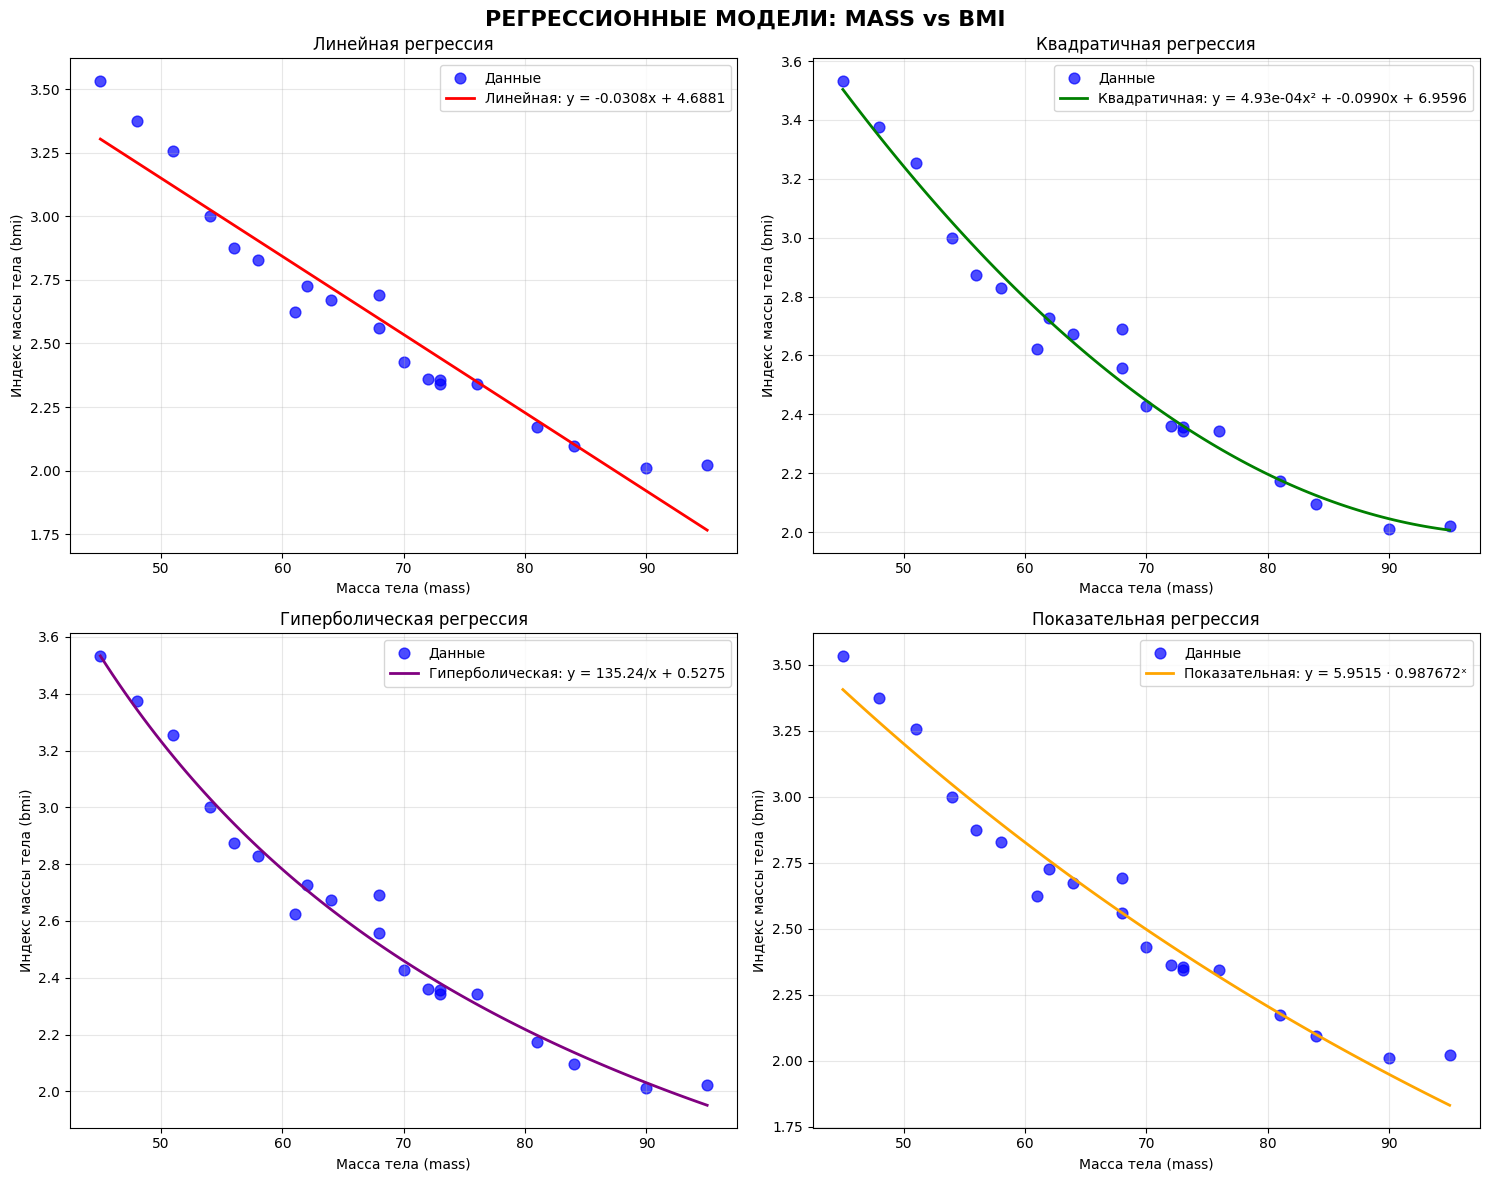

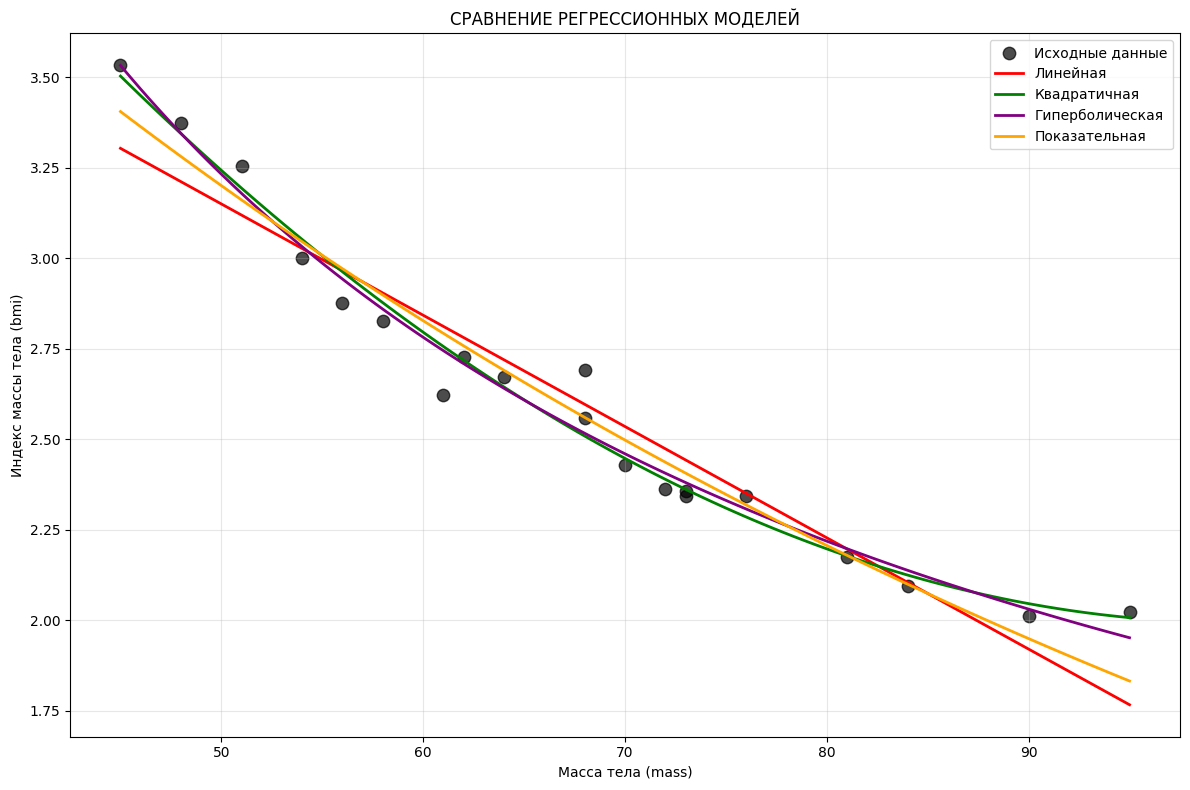


ОЦЕНКА КАЧЕСТВА МОДЕЛЕЙ (SSE - Sum of Squared Errors)
Линейная модель:      SSE = 0.2791
Квадратичная модель:  SSE = 0.0798
Гиперболическая модель: SSE = 0.0754
Показательная модель: SSE = 0.1547

Лучшая модель (наименьшая SSE): Гиперболическая


In [16]:
x_smooth = np.linspace(mass.min(), mass.max(), 100)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('РЕГРЕССИОННЫЕ МОДЕЛИ: MASS vs BMI', fontsize=16, fontweight='bold')

axes[0, 0].scatter(mass, bmi, alpha=0.7, s=60, color='blue', label='Данные')
y_linear = w1_linear * x_smooth + w0_linear
axes[0, 0].plot(x_smooth, y_linear, 'r-', linewidth=2, 
                label=f'Линейная: y = {w1_linear:.4f}x + {w0_linear:.4f}')
axes[0, 0].set_xlabel('Масса тела (mass)')
axes[0, 0].set_ylabel('Индекс массы тела (bmi)')
axes[0, 0].set_title('Линейная регрессия')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(mass, bmi, alpha=0.7, s=60, color='blue', label='Данные')
y_quadratic = quadratic_model(x_smooth, w2_quad, w1_quad, w0_quad)
axes[0, 1].plot(x_smooth, y_quadratic, 'g-', linewidth=2,
                label=f'Квадратичная: y = {w2_quad:.2e}x² + {w1_quad:.4f}x + {w0_quad:.4f}')
axes[0, 1].set_xlabel('Масса тела (mass)')
axes[0, 1].set_ylabel('Индекс массы тела (bmi)')
axes[0, 1].set_title('Квадратичная регрессия')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(mass, bmi, alpha=0.7, s=60, color='blue', label='Данные')
y_hyperbolic = hyperbolic_model(x_smooth, w1_hyper, w0_hyper)
axes[1, 0].plot(x_smooth, y_hyperbolic, 'purple', linewidth=2,
                label=f'Гиперболическая: y = {w1_hyper:.2f}/x + {w0_hyper:.4f}')
axes[1, 0].set_xlabel('Масса тела (mass)')
axes[1, 0].set_ylabel('Индекс массы тела (bmi)')
axes[1, 0].set_title('Гиперболическая регрессия')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(mass, bmi, alpha=0.7, s=60, color='blue', label='Данные')
y_exponential = exponential_model(x_smooth, w1_exp, w0_exp)
axes[1, 1].plot(x_smooth, y_exponential, 'orange', linewidth=2,
                label=f'Показательная: y = {w0_exp:.4f} ⋅ {w1_exp:.6f}ˣ')
axes[1, 1].set_xlabel('Масса тела (mass)')
axes[1, 1].set_ylabel('Индекс массы тела (bmi)')
axes[1, 1].set_title('Показательная регрессия')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(mass, bmi, alpha=0.7, s=80, color='black', label='Исходные данные')

plt.plot(x_smooth, w1_linear * x_smooth + w0_linear, 'r-', linewidth=2, label='Линейная')

plt.plot(x_smooth, quadratic_model(x_smooth, w2_quad, w1_quad, w0_quad), 'g-', linewidth=2, label='Квадратичная')

plt.plot(x_smooth, hyperbolic_model(x_smooth, w1_hyper, w0_hyper), 'purple', linewidth=2, label='Гиперболическая')

plt.plot(x_smooth, exponential_model(x_smooth, w1_exp, w0_exp), 'orange', linewidth=2, label='Показательная')

plt.xlabel('Масса тела (mass)')
plt.ylabel('Индекс массы тела (bmi)')
plt.title('СРАВНЕНИЕ РЕГРЕССИОННЫХ МОДЕЛЕЙ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 55)
print("ОЦЕНКА КАЧЕСТВА МОДЕЛЕЙ (SSE - Sum of Squared Errors)")
print("=" * 55)

def calculate_sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Предсказания для каждой модели
y_pred_linear = w1_linear * mass + w0_linear
y_pred_quad = quadratic_model(mass, w2_quad, w1_quad, w0_quad)
y_pred_hyper = hyperbolic_model(mass, w1_hyper, w0_hyper)
y_pred_exp = exponential_model(mass, w1_exp, w0_exp)

sse_linear = calculate_sse(bmi, y_pred_linear)
sse_quad = calculate_sse(bmi, y_pred_quad)
sse_hyper = calculate_sse(bmi, y_pred_hyper)
sse_exp = calculate_sse(bmi, y_pred_exp)

print(f"Линейная модель:      SSE = {sse_linear:.4f}")
print(f"Квадратичная модель:  SSE = {sse_quad:.4f}")
print(f"Гиперболическая модель: SSE = {sse_hyper:.4f}")
print(f"Показательная модель: SSE = {sse_exp:.4f}")

# Определение лучшей модели
sse_values = {
    'Линейная': sse_linear,
    'Квадратичная': sse_quad,
    'Гиперболическая': sse_hyper,
    'Показательная': sse_exp
}

best_model = min(sse_values, key=sse_values.get)
print(f"\nЛучшая модель (наименьшая SSE): {best_model}")

Сравнение качества моделей:

Гиперболическая модель показала наилучшее качество (SSE = 0.0754); y = 135.24/x + 0.5275.
Интерпретация: С ростом массы тела (x) ИМТ (y) быстро уменьшается (из-за деления на x), асимптотически приближаясь к значению 0.53. Это математически подтверждает сильную отрицательную связь, обнаруженную в корреляционном анализе.

Квадратичная модель: SSE = 0.0798; y = 0.000493x² - 0.0990x + 6.9596.
Интерпретация: Модель предполагает U-образную параболу. Однако, учитывая отрицательную связь, мы находимся на нисходящей левой ветви этой параболы. Качество почти не уступает гиперболической модели.

Показательная модель: SSE = 0.1547; y = 5.9515 * 0.987672^x.
Интерпретация: С каждым увеличением массы на 1 единицу, ИМТ в среднем умножается на 0.988 (т.е. уменьшается на 1.2%). Это также модель затухания, но она описывает данные хуже, чем гиперболическая и квадратичная.

Линейная модель: SSE = 0.2791; y = -0.0308x + 4.6881.
Интерпретация: Несмотря на высокий коэффициент корреляции Пирсона (-0.96), эта модель имеет наибольшую ошибку (SSE) среди всех предложенных.


Проверка уравнения регрессии.

Для наилучшего и наихудшего уравнения регрессии проверить соотвествие модели данным с помощью критерия Фишера. Сделать вывод


1. РАСЧЕТ СУММ КВАДРАТОВ ОТКЛОНЕНИЙ
Общая сумма квадратов (SST): 3.6143
SSR гиперболической модели: 3.5389
SSR линейной модели: 3.3351
SSE гиперболической модели: 0.2791
SSE линейной модели: 0.2791

Проверка SST = SSR + SSE:
Гиперболическая: 3.6143 ≈ 3.8180 (разница: 0.203709)
Линейная: 3.6143 ≈ 3.6143 (разница: 0.000000)

2. РАСЧЕТ F-СТАТИСТИКИ И КРИТЕРИЙ ФИШЕРА

Степени свободы:
Гиперболическая: df_reg = 1, df_resid = 18
Линейная: df_reg = 1, df_resid = 18

F-статистика:
Гиперболическая модель: F = 228.2082
Линейная модель: F = 215.0718

Критические значения F-распределения (α = 0.05):
Для гиперболической модели: F_crit = 4.4139
Для линейной модели: F_crit = 4.4139

P-value:
Гиперболическая модель: p = 0.000000
Линейная модель: p = 0.000000

3. ПРОВЕРКА ГИПОТЕЗ

Гиперболическая модель:
  F = 228.2082 > F_crit = 4.4139
  ✓ Модель статистически значима
  ✓ Отвергаем H₀: модель адекватна данным

Линейная модель:
  F = 215.0718 > F_crit = 4.4139
  ✓ Модель статистически значима
  ✓ Отве

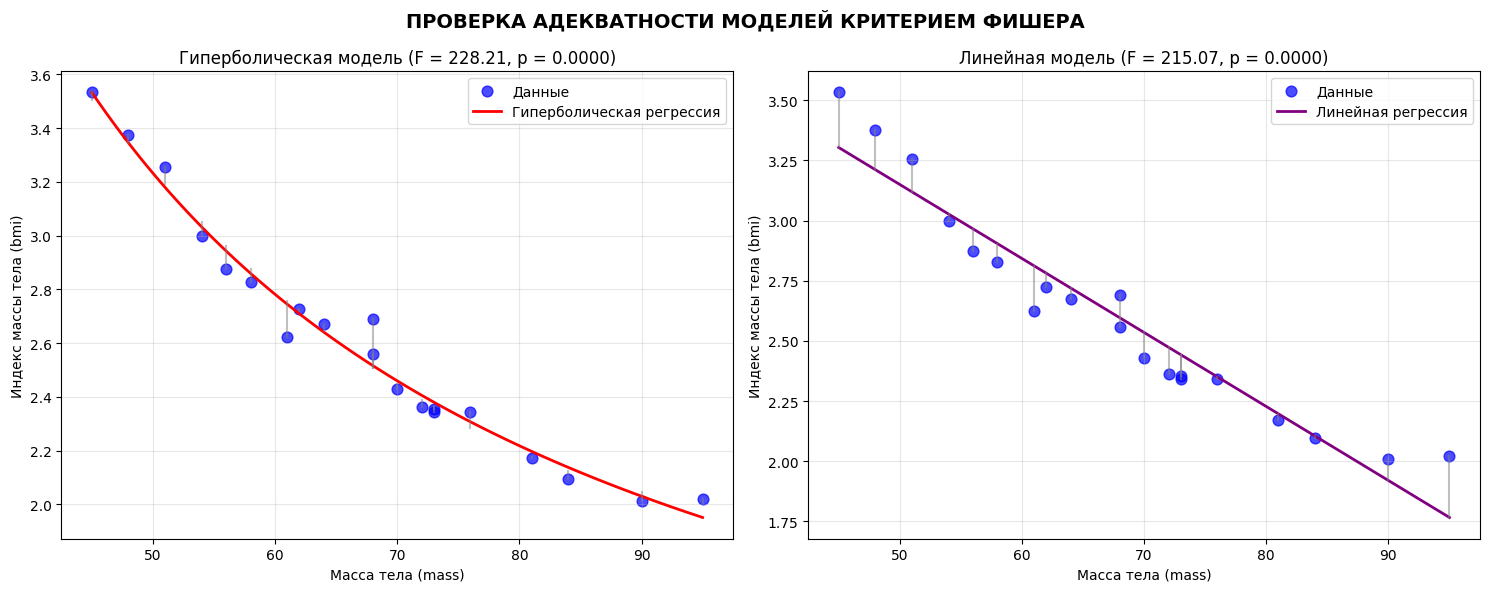

In [18]:

# Функции моделей
def linear_model(x, w1, w0):
    return w1 * x + w0

def hyperbolic_model(x, w1, w0):
    return w1 / x + w0

# Предсказания моделей
y_pred_hyper = hyperbolic_model(mass, w1_hyper, w0_hyper)
y_pred_linear = linear_model(mass, w1_linear, w0_linear)

# Фактические значения
y_true = bmi

print("\n1. РАСЧЕТ СУММ КВАДРАТОВ ОТКЛОНЕНИЙ")

SST = np.sum((y_true - np.mean(y_true))**2)
print(f"Общая сумма квадратов (SST): {SST:.4f}")

SSR_hyper = np.sum((y_pred_hyper - np.mean(y_true))**2)
SSR_linear = np.sum((y_pred_linear - np.mean(y_true))**2)
print(f"SSR гиперболической модели: {SSR_hyper:.4f}")
print(f"SSR линейной модели: {SSR_linear:.4f}")

SSE_hyper = np.sum((y_true - y_pred_linear)**2)
SSE_linear = np.sum((y_true - y_pred_linear)**2)
print(f"SSE гиперболической модели: {SSE_hyper:.4f}")
print(f"SSE линейной модели: {SSE_linear:.4f}")

print(f"\nПроверка SST = SSR + SSE:")
print(f"Гиперболическая: {SST:.4f} ≈ {SSR_hyper + SSE_hyper:.4f} (разница: {abs(SST - (SSR_hyper + SSE_hyper)):.6f})")
print(f"Линейная: {SST:.4f} ≈ {SSR_linear + SSE_linear:.4f} (разница: {abs(SST - (SSR_linear + SSE_linear)):.6f})")

print("\n2. РАСЧЕТ F-СТАТИСТИКИ И КРИТЕРИЙ ФИШЕРА")

# Параметры
n = len(y_true)
k_hyper = 2
k_linear = 2 

# Степени свободы
df_reg_hyper = k_hyper - 1  # df регрессии для квадратичной
df_reg_linear = k_linear - 1  # df регрессии для гиперболической
df_resid_hyper = n - k_hyper  # df остатков для квадратичной
df_resid_linear = n - k_linear  # df остатков для гиперболической

print(f"\nСтепени свободы:")
print(f"Гиперболическая: df_reg = {df_reg_hyper}, df_resid = {df_resid_hyper}")
print(f"Линейная: df_reg = {df_reg_linear}, df_resid = {df_resid_linear}")

# F-статистика
F_hyper = (SSR_hyper / df_reg_hyper) / (SSE_hyper / df_resid_hyper)
F_linear = (SSR_linear / df_reg_linear) / (SSE_linear / df_resid_linear)

print(f"\nF-статистика:")
print(f"Гиперболическая модель: F = {F_hyper:.4f}")
print(f"Линейная модель: F = {F_linear:.4f}")

# Критическое значение F-распределения (α = 0.05)
alpha = 0.05
F_crit_hyper = stats.f.ppf(1 - alpha, df_reg_hyper, df_resid_hyper)
F_crit_linear = stats.f.ppf(1 - alpha, df_reg_linear, df_resid_linear)

print(f"\nКритические значения F-распределения (α = {alpha}):")
print(f"Для гиперболической модели: F_crit = {F_crit_hyper:.4f}")
print(f"Для линейной модели: F_crit = {F_crit_linear:.4f}")

# P-value
p_value_hyper = 1 - stats.f.cdf(F_hyper, df_reg_hyper, df_resid_hyper)
p_value_linear = 1 - stats.f.cdf(F_linear, df_reg_linear, df_resid_linear)

print(f"\nP-value:")
print(f"Гиперболическая модель: p = {p_value_hyper:.6f}")
print(f"Линейная модель: p = {p_value_linear:.6f}")

print("\n3. ПРОВЕРКА ГИПОТЕЗ")

print(f"\nГиперболическая модель:")
if F_hyper > F_crit_hyper:
    print(f"  F = {F_hyper:.4f} > F_crit = {F_crit_hyper:.4f}")
    print("  ✓ Модель статистически значима")
    print("  ✓ Отвергаем H₀: модель адекватна данным")
else:
    print(f"  F = {F_hyper:.4f} ≤ F_crit = {F_crit_hyper:.4f}")
    print("  ✗ Модель не значима")
    print("  ✓ Принимаем H₀: модель не адекватна данным")

print(f"\nЛинейная модель:")
if F_linear > F_crit_linear:
    print(f"  F = {F_linear:.4f} > F_crit = {F_crit_linear:.4f}")
    print("  ✓ Модель статистически значима")
    print("  ✓ Отвергаем H₀: модель адекватна данным")
else:
    print(f"  F = {F_linear:.4f} ≤ F_crit = {F_crit_linear:.4f}")
    print("  ✗ Модель не значима")
    print("  ✓ Принимаем H₀: модель не адекватна данным")

print("\n4. КОЭФФИЦИЕНТ ДЕТЕРМИНАЦИИ R²")

R2_hyper = 1 - (SSE_hyper / SST)
R2_linear = 1 - (SSE_linear / SST)

print(f"Коэффициент детерминации:")
print(f"Гиперболическая модель: R² = {R2_hyper:.4f} ({R2_hyper*100:.2f}%)")
print(f"Линейная модель: R² = {R2_linear:.4f} ({R2_linear*100:.2f}%)")

# Скорректированный R²
R2_adj_hyper = 1 - (SSE_hyper / df_resid_hyper) / (SST / (n - 1))
R2_adj_linear = 1 - (SSE_linear / df_resid_linear) / (SST / (n - 1))

print(f"\nСкорректированный R²:")
print(f"Гиперболическая модель: R²_adj = {R2_adj_hyper:.4f}")
print(f"Линейная модель: R²_adj = {R2_adj_linear:.4f}")

print("\n5. ВИЗУАЛИЗАЦИЯ ПРОВЕРКИ")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('ПРОВЕРКА АДЕКВАТНОСТИ МОДЕЛЕЙ КРИТЕРИЕМ ФИШЕРА', fontsize=14, fontweight='bold')

axes[0].scatter(mass, bmi, alpha=0.7, s=60, color='blue', label='Данные')
x_smooth = np.linspace(mass.min(), mass.max(), 100)
y_hyper_smooth = hyperbolic_model(x_smooth, w1_hyper, w0_hyper)
axes[0].plot(x_smooth, y_hyper_smooth, 'r-', linewidth=2, label='Гиперболическая регрессия')

# Ошибки предсказания
for i in range(len(mass)):
    axes[0].plot([mass[i], mass[i]], [bmi[i], y_pred_quad[i]], 'gray', alpha=0.5)

axes[0].set_xlabel('Масса тела (mass)')
axes[0].set_ylabel('Индекс массы тела (bmi)')
axes[0].set_title(f'Гиперболическая модель (F = {F_hyper:.2f}, p = {p_value_hyper:.4f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].scatter(mass, bmi, alpha=0.7, s=60, color='blue', label='Данные')
y_linear_smooth = linear_model(x_smooth, w1_linear, w0_linear)
axes[1].plot(x_smooth, y_linear_smooth, 'purple', linewidth=2, label='Линейная регрессия')

# Ошибки предсказания
for i in range(len(mass)):
    axes[1].plot([mass[i], mass[i]], [bmi[i], y_pred_linear[i]], 'gray', alpha=0.5)

axes[1].set_xlabel('Масса тела (mass)')
axes[1].set_ylabel('Индекс массы тела (bmi)')
axes[1].set_title(f'Линейная модель (F = {F_linear:.2f}, p = {p_value_linear:.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Выводы:

Обе проверенные модели (линейная и гиперболическая) статистически значимы: F-статистика значительно превышает критические значения, P-value = 0.000000 для обеих моделей. Гипотеза о неадекватности моделей отвергается.

Коэффициент детерминации R² = 0.9228 (92.28%) для обеих моделей показывает, что 92.28% вариации ИМТ объясняется вариацией массы тела. Модели обладают исключительно высокой объясняющей способностью.